In [81]:
from sympy import *
from sympy.physics.quantum.operator import *
from sympy.physics.quantum import Commutator
init_printing() 

m, h_b, h, x, f, p, omega, y, z = symbols("m h_b h x f p omega y z")


def COMM(A, B, f):
    return expand((Commutator(A, B)*f).doit())

def OP(x):
    return Operator(x)

def p_OP(x):
    return Operator(-I*h_b*(Derivative("1", x)))

def Hamiltonian(x):
    return Operator(((-(h_b)**2)/(2*m))*((Derivative("1", x, x))))

def f(x):
    return Operator(Function('f')(x))

def Prod_Rule_Sp(A, B, C):
    return A*diff_sp(f, C) + B*diff(A, C)

def diff_sp(F, x):
    return Operator(Derivative(Function('f')(x)))


# Try this example: 

Note: This is the x operator and the momentum operator in respect to x

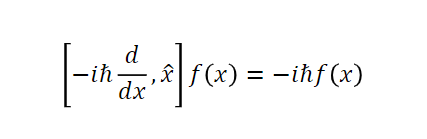

Step one: Plug in the values into the COMM() function:

It is important to note that this function utilizes an auxillary function, f(x)

-x*-I*h_b*Derivative(1, x)*f(x) - I*h_b*Derivative(1, x)*x*f(x)


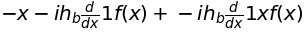

In [82]:
print(COMM(p_OP(x), OP(x), f(x))) 
display(COMM(p_OP(x), OP(x), f(x)))                    

Copy and paste the first line into the next cell - the one with the print()

The second line is shown so it is easier to visualize, but is not necessary.

There are two derivatives in this example, and both need to be replaced. 

So, the derivative in the first term, Derivative(1, x)*f will be replaced with:

Derivative(f(x), x)

Which does not compute the derivative, it is a symbollic representation of the derivative of the auxillary function.



The derivative in the second term involves the product rule. Derivative(1, x)*x*f, will be replaced with:

Prod_Rule_Sp(x, f(x))

Since f(x) is an auxillary function, it cannot be differentiated normally. This lead to the development of Prod_Rule_Sp()

This allows the derivative of f(x) to be taken symbollicaly when the product rule is applied, while still being able to differentiate the other term.

I*h_b*x*Derivative(f(x), x) - I*h_b*(x*Derivative(f(x), x) + f(x))


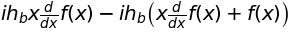

In [83]:
print((-x*-I*h_b*Derivative(f(x), x) - I*h_b*Prod_Rule_Sp(x, f(x), x)))
display(-x*-I*h_b*Derivative(f(x), x) - I*h_b*Prod_Rule_Sp(x, f(x), x))

Again, you can copy the first line, then use the function expand()

This function will simplify the expression.

Again, the display() line is not necessary, but is helpful for visualization.

In [84]:
expand(I*h_b*x*Derivative(f(x), x) - I*h_b*(x*Derivative(f(x), x) + f(x)))

# General Notation & Explanations

Once the operators are chosen/defined, plug them into the COMM(A, B, f) function. This is used along with the auxillary function, f(x)

If there are derivatives, such as:

Derivative("1", x, x)

In the expanded commutator, it is important to change the function that is being derived manually.
For example, if there is the derivative, as shown above, then replace the "1" placeholder with the function to the right.
NOTE THAT THIS IS ONLY IF "f" IS DIRECTLY TO THE RIGHT OF THE DERIVATIVE, AND IS THE ONLY VARIABLE TO THE RIGHT

If there are two or more variables, the product rule needs to happen.

diff((x**2)*y, x, y)

This means replacing "Derivative("1", x, x)" with "diff((A, B, a, b))"
A and B are the expressions, and a, and b are what they are being derived in respect to.
If there is only one derivation, just "a" is needed, no "b"

diff((x**2)*y, x)

If there are two variables, and one of which is the function, the function:

Prod_Rule_Sp(A, f(x))

Is used. It is important to note that the auxillary function "f" always needs to be second in the list, or else it will not compute.

Again, these terms would be inserted into the original expanded commutator.
Once everything is inserted, I would again print twice, once with print() and once with disply()

# Constants for Reference